In [5]:
# 0. Import General Libraries
import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import .csv file

In [101]:
data = pd.read_csv("Cancer Deaths by Country and Type Dataset.csv")
data

,Country,Code,Year,Liver cancer,Kidney cancer,Larynx cancer,Breast cancer,Thyroid cancer,Stomach cancer,Bladder cancer,...,Non-melanoma skin cancer,Lip and oral cavity cancer,Brain and nervous system cancer,"Tracheal, bronchus, and lung cancer",Gallbladder and biliary tract cancer,Malignant skin melanoma,Leukemia,Hodgkin lymphoma,Multiple myeloma,Other cancers
0,Afghanistan,AFG,1990,243.663716,39.470495,109.334207,766.535431,79.820167,923.495208,148.139204,...,26.446156,53.599636,163.869062,797.265710,125.936240,14.293978,727.763429,191.367386,50.719442,294.839679
1,Afghanistan,AFG,1991,261.241824,41.376024,117.311719,823.233932,85.111020,989.709648,156.977412,...,28.275271,57.148890,174.183219,853.126362,133.781377,15.241048,766.040181,203.509622,54.317640,311.469065
2,Afghanistan,AFG,1992,284.443630,44.106315,128.071634,901.022100,92.240603,1078.459037,168.990462,...,30.718152,61.876100,188.382296,927.812846,144.287648,16.508833,820.956547,220.208033,59.144200,334.565964
3,Afghanistan,AFG,1993,313.136816,47.424854,141.429604,996.432762,101.206726,1192.064525,184.347737,...,33.835442,67.504857,205.250430,1017.964700,157.471005,18.038507,891.134162,240.718821,64.938582,362.486749
4,Afghanistan,AFG,1994,343.229715,50.710951,155.754606,1097.895223,110.679923,1316.505674,200.246949,...,37.103370,73.175879,222.383572,1110.997186,171.311262,19.606636,965.286072,262.324068,70.930355,390.334685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,Zimbabwe,ZWE,2012,1218.763107,56.966136,162.131298,783.959361,115.203608,936.013607,420.658042,...,212.201798,95.507275,222.048414,729.985667,91.875318,129.861515,327.561748,56.997563,183.828475,454.914384
5990,Zimbabwe,ZWE,2013,1252.747896,58.735014,161.039807,790.077464,115.846418,928.096553,423.397684,...,213.262823,97.058488,229.271375,728.931891,92.187505,133.293669,332.080678,56.258170,187.740238,466.870431
5991,Zimbabwe,ZWE,2014,1308.483454,61.575167,161.512234,839.938132,121.251540,949.321368,434.314706,...,215.100202,99.866860,240.975514,733.693373,94.962460,139.024680,343.054396,56.235666,195.949471,487.183868
5992,Zimbabwe,ZWE,2015,1357.611713,63.757395,162.909299,862.707637,123.638675,956.138239,442.122976,...,218.011570,102.734862,250.586202,741.287816,96.335115,144.153296,349.937885,55.664075,202.577660,502.675582


# 2. Data Exploring

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                5994 non-null   object 
 1   Code                                   5966 non-null   object 
 2   Year                                   5994 non-null   int64  
 3   Liver cancer                           5994 non-null   float64
 4   Kidney cancer                          5994 non-null   float64
 5   Larynx cancer                          5994 non-null   float64
 6   Breast cancer                          5994 non-null   float64
 7   Thyroid cancer                         5994 non-null   float64
 8   Stomach cancer                         5994 non-null   float64
 9   Bladder cancer                         5994 non-null   float64
 10  Uterine cancer                         5994 non-null   float64
 11  Ovar

It seemed like there are 2 missing values for the `Code` column but we wouldn't bother too much as it won't affect our analysis. Let's move on to checking the distribution of the death numbers for each cancer.

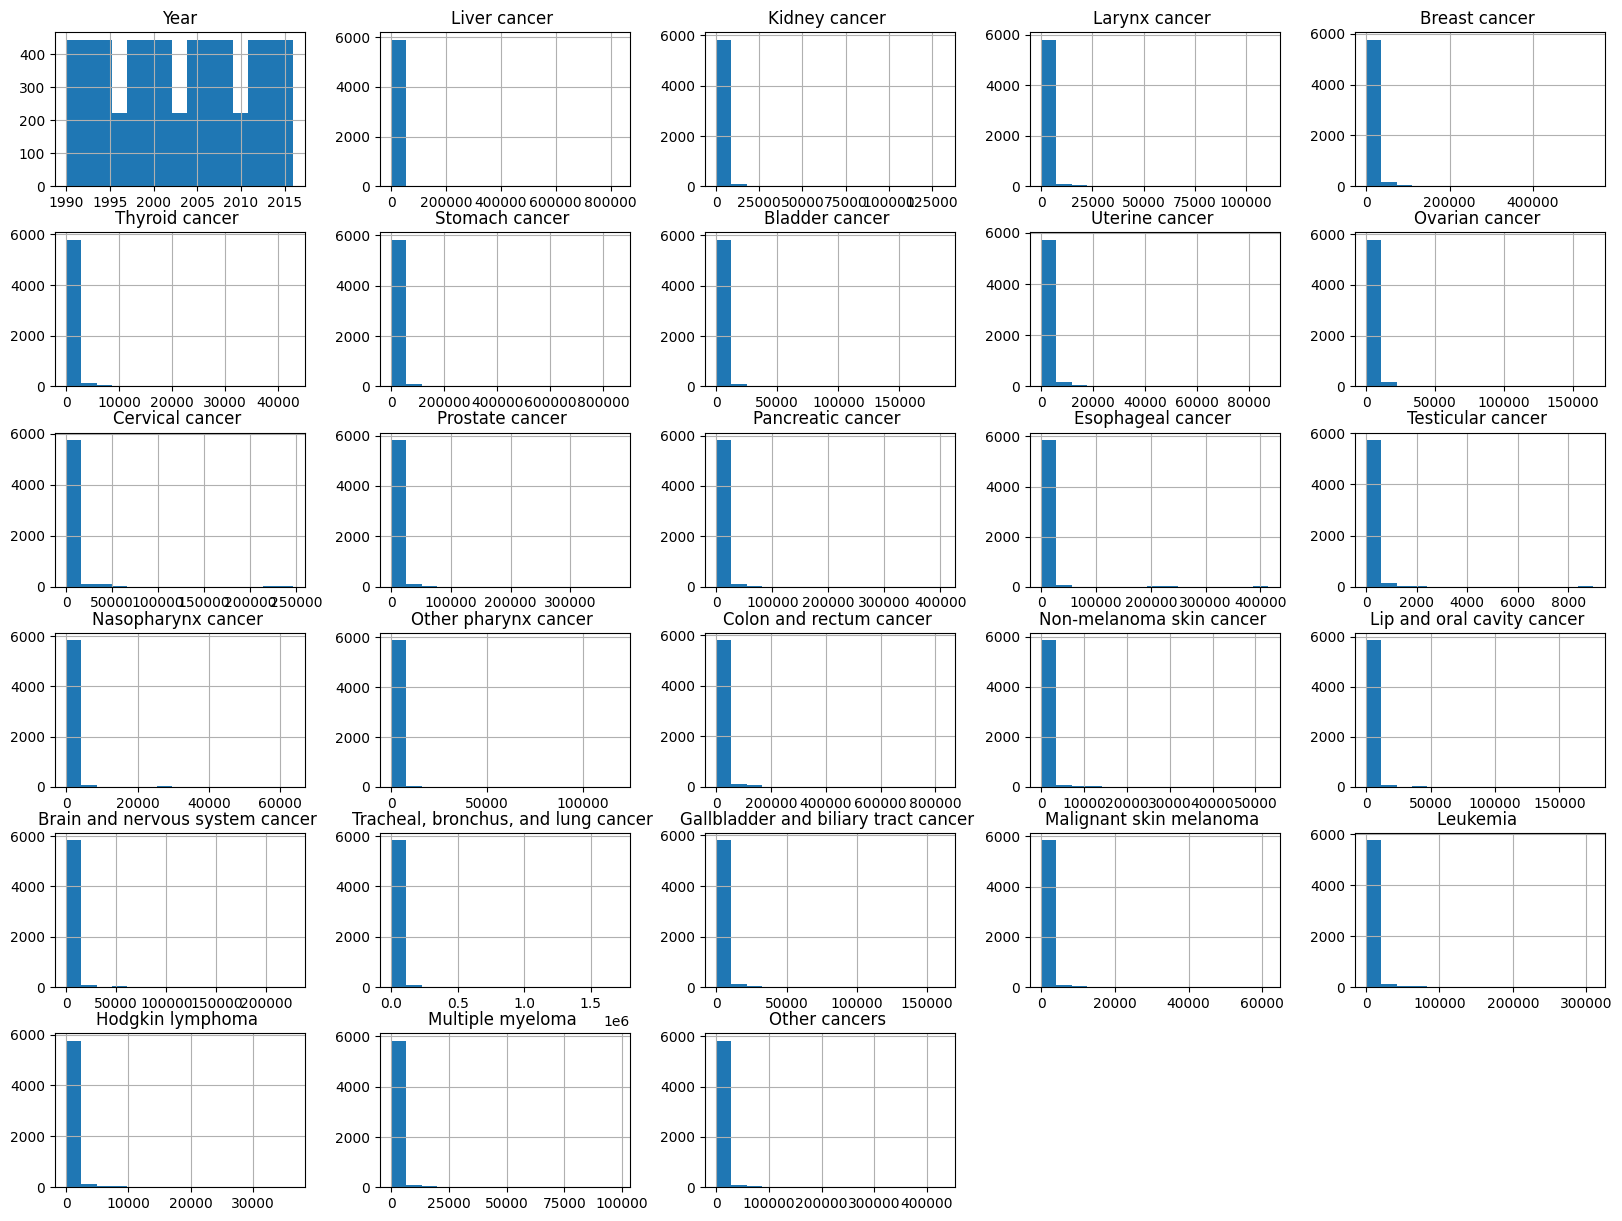

In [9]:
data.hist(bins=15, figsize=(20, 15))
plt.show()

A lot of data is concentrated between 0 - 5000 deaths, but overall I think the the data distribution looked okay since we are not building any ML models on it. 

In [10]:
data.columns

Index(['Country', 'Code', 'Year', 'Liver cancer ', 'Kidney cancer ',
       'Larynx cancer ', 'Breast cancer ', 'Thyroid cancer ',
       'Stomach cancer ', 'Bladder cancer ', 'Uterine cancer ',
       'Ovarian cancer ', 'Cervical cancer ', 'Prostate cancer ',
       'Pancreatic cancer ', 'Esophageal cancer ', 'Testicular cancer ',
       'Nasopharynx cancer ', 'Other pharynx cancer ',
       'Colon and rectum cancer ', 'Non-melanoma skin cancer ',
       'Lip and oral cavity cancer ', 'Brain and nervous system cancer ',
       'Tracheal, bronchus, and lung cancer ',
       'Gallbladder and biliary tract cancer ', 'Malignant skin melanoma ',
       'Leukemia ', 'Hodgkin lymphoma ', 'Multiple myeloma ',
       'Other cancers '],
      dtype='object')

# Data Analysis and Visualization

### A. Which country(ies) is most prevalent to cancer?

In [37]:
data_total_deaths = data.copy()
data_total_deaths['Total_Deaths'] = data_total_deaths.sum(axis=1)
data_total_deaths = data_total_deaths.reset_index()
data_total_deaths

/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_38813/574151986.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_total_deaths['Total_Deaths'] = data_total_deaths.sum(axis=1)


,index,Country,Code,Year,Liver cancer,Kidney cancer,Larynx cancer,Breast cancer,Thyroid cancer,Stomach cancer,...,Lip and oral cavity cancer,Brain and nervous system cancer,"Tracheal, bronchus, and lung cancer",Gallbladder and biliary tract cancer,Malignant skin melanoma,Leukemia,Hodgkin lymphoma,Multiple myeloma,Other cancers,Total_Deaths
0,0,Afghanistan,AFG,1990,243.663716,39.470495,109.334207,766.535431,79.820167,923.495208,...,53.599636,163.869062,797.265710,125.936240,14.293978,727.763429,191.367386,50.719442,294.839679,8270.338533
1,1,Afghanistan,AFG,1991,261.241824,41.376024,117.311719,823.233932,85.111020,989.709648,...,57.148890,174.183219,853.126362,133.781377,15.241048,766.040181,203.509622,54.317640,311.469065,8688.532447
2,2,Afghanistan,AFG,1992,284.443630,44.106315,128.071634,901.022100,92.240603,1078.459037,...,61.876100,188.382296,927.812846,144.287648,16.508833,820.956547,220.208033,59.144200,334.565964,9255.698824
3,3,Afghanistan,AFG,1993,313.136816,47.424854,141.429604,996.432762,101.206726,1192.064525,...,67.504857,205.250430,1017.964700,157.471005,18.038507,891.134162,240.718821,64.938582,362.486749,9959.173212
4,4,Afghanistan,AFG,1994,343.229715,50.710951,155.754606,1097.895223,110.679923,1316.505674,...,73.175879,222.383572,1110.997186,171.311262,19.606636,965.286072,262.324068,70.930355,390.334685,10699.703078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,5989,Zimbabwe,ZWE,2012,1218.763107,56.966136,162.131298,783.959361,115.203608,936.013607,...,95.507275,222.048414,729.985667,91.875318,129.861515,327.561748,56.997563,183.828475,454.914384,14002.783062
5990,5990,Zimbabwe,ZWE,2013,1252.747896,58.735014,161.039807,790.077464,115.846418,928.096553,...,97.058488,229.271375,728.931891,92.187505,133.293669,332.080678,56.258170,187.740238,466.870431,14106.912363
5991,5991,Zimbabwe,ZWE,2014,1308.483454,61.575167,161.512234,839.938132,121.251540,949.321368,...,99.866860,240.975514,733.693373,94.962460,139.024680,343.054396,56.235666,195.949471,487.183868,14517.564017
5992,5992,Zimbabwe,ZWE,2015,1357.611713,63.757395,162.909299,862.707637,123.638675,956.138239,...,102.734862,250.586202,741.287816,96.335115,144.153296,349.937885,55.664075,202.577660,502.675582,14779.168560


In [38]:
top10_countries = data_total_deaths.groupby('Country')['Total_Deaths'].mean()
top10_countries = pd.DataFrame(top10_countries)
top10_countries.sort_values(by='Total_Deaths', inplace=True, ascending=False)
top10_countries.head(30)

,Total_Deaths
Country,
World,7.073551e+06
East Asia,2.039022e+06
China,1.967388e+06
Western Europe,1.001946e+06
South Asia,7.185959e+05
North America,6.268548e+05
United States,5.608583e+05
India,5.503446e+05
Eastern Europe,4.408834e+05


China, United States, India, Japan, Russia, Germany, Italy, Brazil, United Kingdom, France.

In [39]:
top10_countries_by_numdeaths = data_total_deaths[data_total_deaths['Country'].isin(['China', 'United States', 'India', 'Japan', 'Russia', 'Germany', 'Italy', 'Brazil', 'United Kingdom', 'France'])]
top10_countries_by_numdeaths.reset_index(inplace=True, drop=True)
top10_countries_by_numdeaths

,index,Country,Code,Year,Liver cancer,Kidney cancer,Larynx cancer,Breast cancer,Thyroid cancer,Stomach cancer,...,Lip and oral cavity cancer,Brain and nervous system cancer,"Tracheal, bronchus, and lung cancer",Gallbladder and biliary tract cancer,Malignant skin melanoma,Leukemia,Hodgkin lymphoma,Multiple myeloma,Other cancers,Total_Deaths
0,729,Brazil,BRA,1990,4140.871247,1184.258534,2340.776132,7451.705380,549.266651,13628.00481,...,2089.254495,2719.029218,13306.89676,2780.822602,756.510095,5047.416222,665.833081,937.064093,7069.198327,102392.087651
1,730,Brazil,BRA,1991,4249.827374,1233.303647,2410.815891,7692.172477,560.404324,13760.18683,...,2183.823220,2821.798677,13764.16888,2841.317196,791.951443,5147.873698,673.673711,977.936676,7265.601141,105208.746866
2,731,Brazil,BRA,1992,4384.599889,1277.271362,2512.241607,8143.539488,574.622403,14048.92466,...,2276.921202,2963.519619,14350.85661,2940.532529,835.497011,5244.155289,678.437719,1027.585933,7434.636759,109097.613786
3,732,Brazil,BRA,1993,4473.820208,1328.560519,2610.282252,8523.748856,587.107472,14253.72625,...,2356.916489,3154.756343,14873.67723,3017.834251,877.233190,5324.087336,664.998215,1078.724061,7522.056103,112556.303403
4,733,Brazil,BRA,1994,4585.835116,1378.121206,2705.715684,8964.235381,602.708588,14436.42046,...,2467.099048,3360.391524,15510.59750,3089.610543,926.314538,5434.202240,664.846022,1137.899066,7590.962772,116456.065465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,5638,United States,USA,2012,23013.296680,14860.889060,4583.270464,45383.173140,1815.403479,15739.10167,...,6122.884127,15356.519600,174673.26940,3989.776618,9553.936519,26817.418770,1242.862490,12868.631520,26456.504380,600493.371535
266,5639,United States,USA,2013,23758.093550,15209.921280,4675.968657,46063.994680,1870.253410,16002.71057,...,6271.881775,15718.273980,177978.53440,4078.054520,9769.614663,27274.043310,1246.985186,13185.342430,26994.633150,612783.654637
267,5640,United States,USA,2014,24278.476280,15496.437030,4769.668341,46918.016940,1910.261798,16280.97150,...,6431.303689,16087.860150,181157.74340,4175.108366,9956.781762,27678.137060,1258.615182,13489.408410,27585.145810,624819.401827
268,5641,United States,USA,2015,24450.776940,15917.193210,4913.477824,48245.610900,1946.509745,16713.40950,...,6596.072527,16440.491320,186482.96110,4265.474259,10240.145320,28298.409150,1299.157575,13859.382480,28106.294690,641382.463752


In [47]:
top10_countries_by_numdeaths['YoY_change'] = 100 * top10_countries_by_numdeaths.groupby('Country')['Total_Deaths'].pct_change()
top10_countries_by_numdeaths

/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_38813/1519290481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_countries_by_numdeaths['YoY_change'] = 100 * top10_countries_by_numdeaths.groupby('Country')['Total_Deaths'].pct_change()


,index,Country,Code,Year,Liver cancer,Kidney cancer,Larynx cancer,Breast cancer,Thyroid cancer,Stomach cancer,...,Brain and nervous system cancer,"Tracheal, bronchus, and lung cancer",Gallbladder and biliary tract cancer,Malignant skin melanoma,Leukemia,Hodgkin lymphoma,Multiple myeloma,Other cancers,Total_Deaths,YoY_change
0,729,Brazil,BRA,1990,4140.871247,1184.258534,2340.776132,7451.705380,549.266651,13628.00481,...,2719.029218,13306.89676,2780.822602,756.510095,5047.416222,665.833081,937.064093,7069.198327,102392.087651,NaN
1,730,Brazil,BRA,1991,4249.827374,1233.303647,2410.815891,7692.172477,560.404324,13760.18683,...,2821.798677,13764.16888,2841.317196,791.951443,5147.873698,673.673711,977.936676,7265.601141,105208.746866,2.750856
2,731,Brazil,BRA,1992,4384.599889,1277.271362,2512.241607,8143.539488,574.622403,14048.92466,...,2963.519619,14350.85661,2940.532529,835.497011,5244.155289,678.437719,1027.585933,7434.636759,109097.613786,3.696334
3,732,Brazil,BRA,1993,4473.820208,1328.560519,2610.282252,8523.748856,587.107472,14253.72625,...,3154.756343,14873.67723,3017.834251,877.233190,5324.087336,664.998215,1078.724061,7522.056103,112556.303403,3.170271
4,733,Brazil,BRA,1994,4585.835116,1378.121206,2705.715684,8964.235381,602.708588,14436.42046,...,3360.391524,15510.59750,3089.610543,926.314538,5434.202240,664.846022,1137.899066,7590.962772,116456.065465,3.464721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,5638,United States,USA,2012,23013.296680,14860.889060,4583.270464,45383.173140,1815.403479,15739.10167,...,15356.519600,174673.26940,3989.776618,9553.936519,26817.418770,1242.862490,12868.631520,26456.504380,600493.371535,1.764553
266,5639,United States,USA,2013,23758.093550,15209.921280,4675.968657,46063.994680,1870.253410,16002.71057,...,15718.273980,177978.53440,4078.054520,9769.614663,27274.043310,1246.985186,13185.342430,26994.633150,612783.654637,2.046698
267,5640,United States,USA,2014,24278.476280,15496.437030,4769.668341,46918.016940,1910.261798,16280.97150,...,16087.860150,181157.74340,4175.108366,9956.781762,27678.137060,1258.615182,13489.408410,27585.145810,624819.401827,1.964110
268,5641,United States,USA,2015,24450.776940,15917.193210,4913.477824,48245.610900,1946.509745,16713.40950,...,16440.491320,186482.96110,4265.474259,10240.145320,28298.409150,1299.157575,13859.382480,28106.294690,641382.463752,2.650856


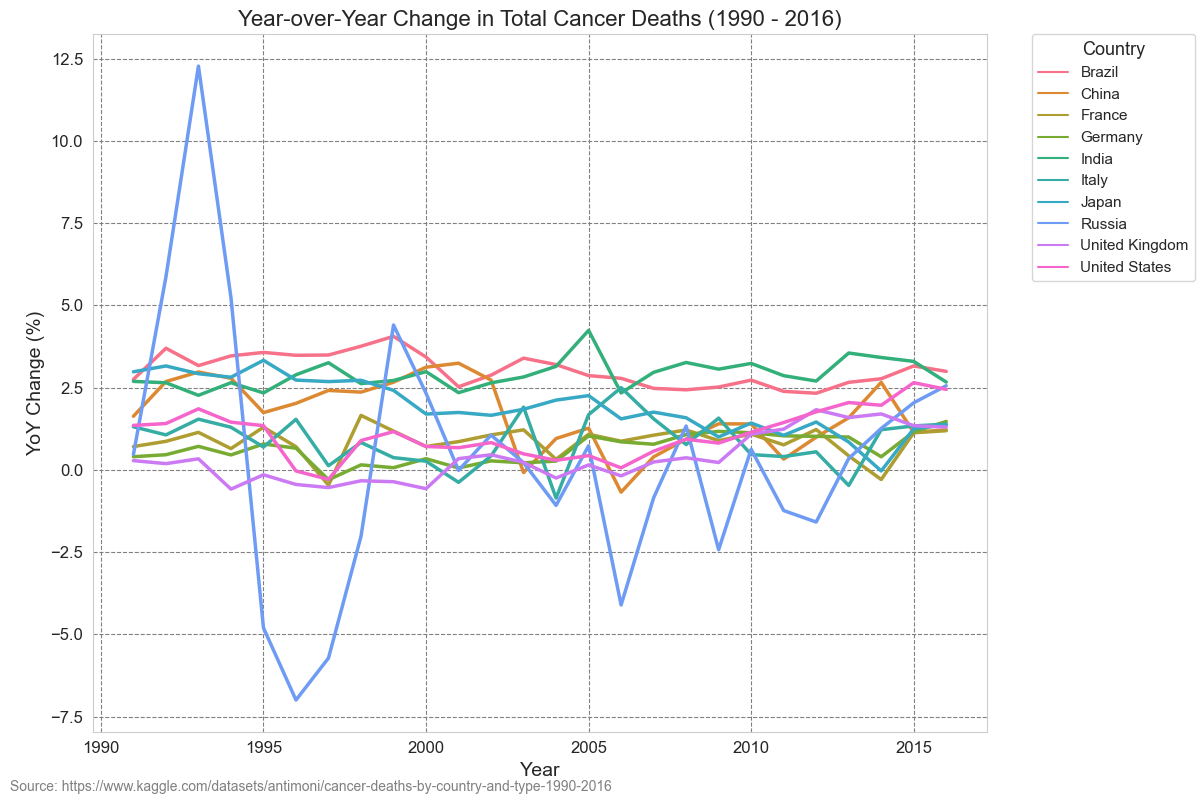

In [102]:
plt.figure(figsize=(12,8))

# Define a color palette
palette = sns.color_palette("husl", 10)

sns.lineplot(x='Year', y='YoY_change', hue='Country', data=top10_countries_by_numdeaths, palette=palette, linewidth=2.5)

# Set plot title and labels with increased font sizes
plt.title('Year-over-Year Change in Total Cancer Deaths (1990 - 2016)', fontsize=16)
plt.ylabel('YoY Change (%)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.figtext(0.5, 0.005, "Source: https://www.kaggle.com/datasets/antimoni/cancer-deaths-by-country-and-type-1990-2016", ha="right", fontsize=10, color='gray')

# Customize the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Country', title_fontsize='13', fontsize='11')

# Customize the grid and axes
plt.grid(True, which="both", ls="--", c='gray')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [91]:
data_total_deaths[data_total_deaths['Country'] == 'Russia'][['Year', 'Total_Deaths']]

,Year,Total_Deaths
4293,1990,278894.942756
4294,1991,280197.860220
4295,1992,296635.708037
4296,1993,333041.485112
4297,1994,350487.942479
4298,1995,333653.038615
4299,1996,310310.832542
4300,1997,292560.773374
4301,1998,286650.024621
4302,1999,299272.339847


Russia has the most fluctuation, it would be interesting to find out why, and I then tried finding out which cancer type is the leading cause to death in Russia?

### B. In Russia, which cancer type is the leading cause to death?

In [59]:
russia_df = data[data['Country'] == "Russia"]
russia_df.reset_index(inplace=True)
russia_df

,index,Country,Code,Year,Liver cancer,Kidney cancer,Larynx cancer,Breast cancer,Thyroid cancer,Stomach cancer,...,Non-melanoma skin cancer,Lip and oral cavity cancer,Brain and nervous system cancer,"Tracheal, bronchus, and lung cancer",Gallbladder and biliary tract cancer,Malignant skin melanoma,Leukemia,Hodgkin lymphoma,Multiple myeloma,Other cancers
0,4293,Russia,RUS,1990,8235.657621,4390.930951,6072.527920,16300.73818,1051.548802,53002.37089,...,1219.587334,4568.498387,6957.390507,60911.79186,5816.441347,2732.568383,8567.259364,1511.625663,1825.539384,9914.693207
1,4294,Russia,RUS,1991,8432.279690,4541.342303,6180.405371,16707.27336,1060.370039,51262.08702,...,1250.625503,4704.396840,7117.620344,61016.41307,5814.416077,2822.346546,8593.803676,1534.779370,1871.471069,10116.153530
2,4295,Russia,RUS,1992,8795.603457,4843.285643,6864.535295,18147.50598,1118.485849,53205.55373,...,1341.589305,5033.162717,7472.696815,65695.14042,6066.153846,3010.947406,8836.952482,1660.634983,1973.084792,10561.010900
3,4296,Russia,RUS,1993,9356.050597,5264.269832,8174.595144,21401.68408,1268.474653,60160.45231,...,1496.362092,5451.281647,8062.417280,75735.61174,6804.237675,3352.999075,9437.672380,1921.897282,2117.906913,11240.618110
4,4297,Russia,RUS,1994,9646.333570,5589.550230,8782.226602,23364.57063,1363.391419,62784.20734,...,1613.879828,5643.542555,8359.858828,80038.59350,7147.730669,3581.587404,9686.919452,2069.673244,2192.636901,11589.664000
5,4298,Russia,RUS,1995,9485.096543,5663.201647,8143.106610,22378.19622,1331.576640,57798.03438,...,1633.544812,5455.625865,8141.769182,74739.06367,6715.580777,3526.103245,9367.637657,1970.558880,2138.760965,11454.005440
6,4299,Russia,RUS,1996,9166.712544,5672.026469,7275.850443,21038.18053,1280.118979,51977.55355,...,1619.486062,5223.175516,7716.911370,66762.79203,6150.016993,3385.895515,8880.791926,1809.551893,2061.264881,11212.853610
7,4300,Russia,RUS,1997,8929.992469,5760.889076,6533.513152,20208.60007,1244.587072,47257.51343,...,1634.461463,5033.356954,7304.560317,60683.65196,5688.035594,3300.337984,8541.667626,1661.016225,2007.729708,11092.834550
8,4301,Russia,RUS,1998,8773.967939,6066.690106,6178.153877,20284.16110,1247.192639,45340.76862,...,1713.286809,4978.188460,6972.586033,57932.17498,5346.132756,3290.638189,8466.510806,1611.328371,1999.796594,11327.344090
9,4302,Russia,RUS,1999,8756.867998,6876.839644,6412.127371,21987.43929,1301.292700,47462.75842,...,1942.634789,5171.888097,6577.742684,60212.43104,5125.485739,3373.308459,8836.512185,1651.711632,2059.968520,12301.635170


In [84]:
cancer_type = pd.DataFrame(russia_df.iloc[:, 4:].mean())
cancer_type.columns = ['avg_death']
cancer_type.sort_values(by='avg_death', ascending=False, inplace=True)
cancer_type

,avg_death
"Tracheal, bronchus, and lung cancer",59358.935651
Stomach cancer,44809.571806
Colon and rectum cancer,37490.009351
Breast cancer,22317.818390
Pancreatic cancer,14334.314614
Other cancers,11886.520045
Liver cancer,9155.676315
Leukemia,8632.211692
Prostate cancer,8569.789716
Ovarian cancer,8357.626696


In [85]:
cancer_type = cancer_type[:15]
cancer_type

,avg_death
"Tracheal, bronchus, and lung cancer",59358.935651
Stomach cancer,44809.571806
Colon and rectum cancer,37490.009351
Breast cancer,22317.818390
Pancreatic cancer,14334.314614
Other cancers,11886.520045
Liver cancer,9155.676315
Leukemia,8632.211692
Prostate cancer,8569.789716
Ovarian cancer,8357.626696


#### Plot horizontal bar chart

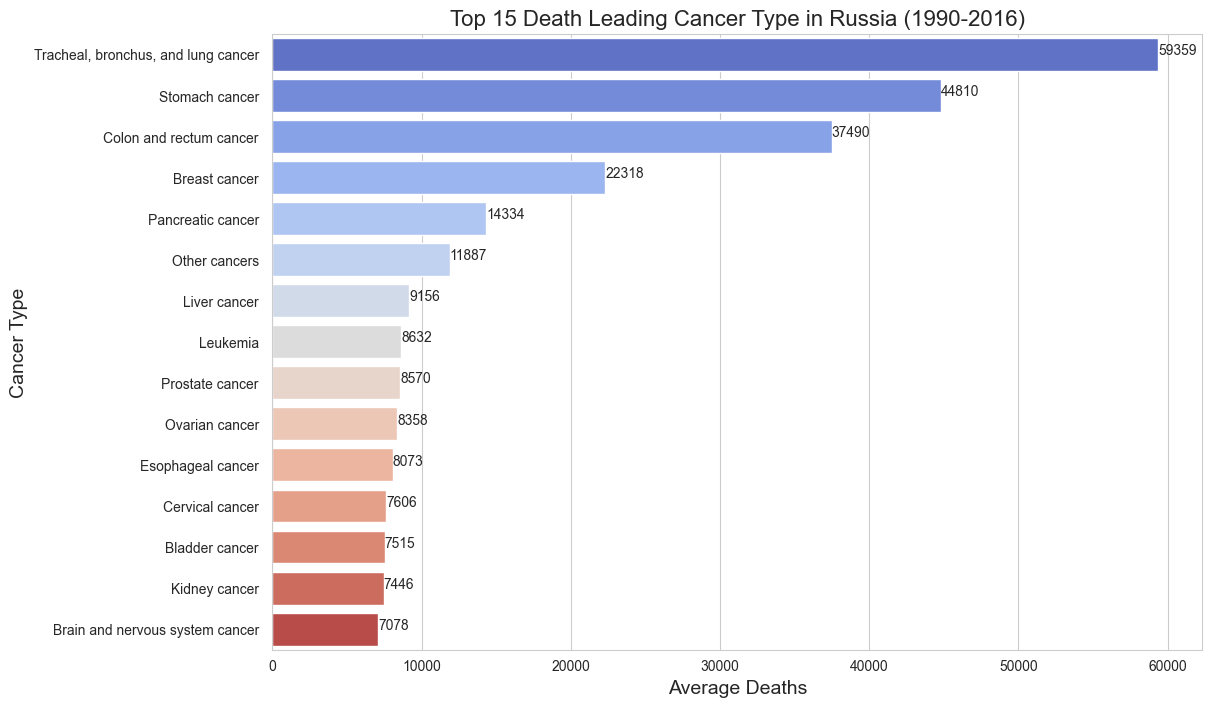

In [88]:
# Step 3: Plot the data using a horizontal bar chart
plt.figure(figsize=(12, 8))

# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", len(cancer_type))

# Plot the data
ax = sns.barplot(x='avg_death', y=cancer_type.index, data=cancer_type, palette=palette)

# Adding value labels
for index, value in enumerate(cancer_type['avg_death']):
    ax.text(value, index, f'{value:.0f}')

# Setting labels and title with increased font size
plt.xlabel('Average Deaths', fontsize=14)
plt.ylabel('Cancer Type', fontsize=14)
plt.title('Top 15 Death Leading Cancer Type in Russia (1990-2016)', fontsize=16)

# Display the plot
plt.show()